In [6]:
from collections import Counter    
import matplotlib.pyplot as plt

In [2]:
class KNN:
    
    def __init__(self,k):
        self.k=k
        
    def fit(self,xtrain,ytrain):
        self.xtrain=xtrain
        self.ytrain=ytrain
    
    def helper(self,x):
        dist=((self.xtrain-x)**2).sum(axis=1)     # taking 2degree distance from training data.
        dist_ind=[]
        for i in range(len(dist)):
            dist_ind.append([dist[i],i])
        dist_ind.sort()                # sort in order of least distance from the point.
        dist_ind=dist_ind[0:self.k]    #taking first k.
        votes=[]
        for d,i in dist_ind:
            votes.append(self.ytrain[i])
        return Counter(votes).most_common(1)[0][0]     #getting the count of the class with the most count.
    
    def predict(self,xtest):
        output=[]
        for x in xtest:
            prediction=self.helper(x)
            output.append(prediction)
            
        return output
    
    def score(self,xtest,ytest):
        ypred=self.predict(xtest)
        sc=(ypred==ytest).sum()/len(ytest)          #score calculation
        return sc
        
        

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split   

In [4]:
iris=datasets.load_iris()
xtrain,xtest,ytrain,ytest=train_test_split(iris.data,iris.target,random_state=1) # splitting dataset into train and test

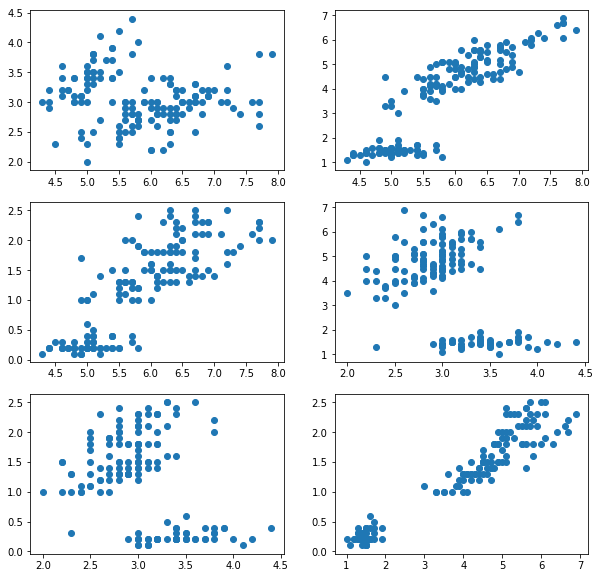

In [30]:
plt.figure(figsize=(10,10))
plt.subplot(321)
plt.scatter(iris.data[:,0],iris.data[:,1])
plt.subplot(322)
plt.scatter(iris.data[:,0],iris.data[:,2])
plt.subplot(323)
plt.scatter(iris.data[:,0],iris.data[:,3])
plt.subplot(324)
plt.scatter(iris.data[:,1],iris.data[:,2])
plt.subplot(325)
plt.scatter(iris.data[:,1],iris.data[:,3])
plt.subplot(326)
plt.scatter(iris.data[:,2],iris.data[:,3])


# how the data is layed out before shuffling to show visual separations/classes.

In [5]:
xtrain[0] , ytrain[0]       # format of iris datset

(array([6.5, 2.8, 4.6, 1.5]), 1)

In [102]:
clf=KNN(5)    # initializing KNN classifier with k value 5
clf.fit(xtrain,ytrain)     # fitting training data into the classifier

In [103]:
print(clf.predict(xtest))     # predicting classes for test data

[0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0]


In [104]:
clf.score(xtest,ytest)        # thats really cool !

1.0

In [105]:
cancer=datasets.load_breast_cancer()     # breast cancer dataset

In [106]:
xtrain,xtest,ytrain,ytest=train_test_split(cancer.data,cancer.target,random_state=20) #splitting into train and test

In [107]:
xtrain[0],ytrain[0]           # breast cancer dataset format

(array([1.246e+01, 2.404e+01, 8.397e+01, 4.759e+02, 1.186e-01, 2.396e-01,
        2.273e-01, 8.543e-02, 2.030e-01, 8.243e-02, 2.976e-01, 1.599e+00,
        2.039e+00, 2.394e+01, 7.149e-03, 7.217e-02, 7.743e-02, 1.432e-02,
        1.789e-02, 1.008e-02, 1.509e+01, 4.068e+01, 9.765e+01, 7.114e+02,
        1.853e-01, 1.058e+00, 1.105e+00, 2.210e-01, 4.366e-01, 2.075e-01]), 0)

In [108]:
clf2=KNN(k=5)
clf2.fit(xtrain,ytrain)
print(clf2.predict(xtest))

[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]


In [109]:
clf2.score(xtest,ytest)      #thats good enough !

0.9300699300699301